## Loading the Dataset

In [1]:
! pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# making a directory for kaggle at the temporary instance location on Colab drive
! mkdir ~/.kaggle


#/content/drive/MyDrive/KaggleStuff/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
# Uploading the json file to Google Drive and then copying to the temporary location

!cp /content/drive/MyDrive/KaggleStuff/kaggle.json ~/.kaggle

In [5]:
#Change the file permissions to read/write to the owner only

! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download kumarvishal88/ml-assignment-1-datasets

ml-assignment-1-datasets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
! pip install ffmpeg-python

## **Import**

In [8]:
## Importing all relevant modules
import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
import PIL
import librosa
import librosa.display
import math
import os
from PIL import Image
import sys
import time
import zipfile
import ffmpeg
from itertools import cycle
import subprocess
from matplotlib.font_manager import FontProperties

# Setting a colour palette for later usage
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])
#sys.getdefaultencoding()



## Random Number Generation Functions

In [9]:
def random_number_generator(low,high,qty):

  """ Uses time module to generate `qty` random numbers between `lo` and `high` """

  numbers = set()
  while(len(numbers)<qty):
    num = (int(time.time())%high) + low - 1
    numbers.add(num)

  return numbers

def middle_square_method(seed, low, high, qty):

  """ Uses the Middle Square Method algorithm (MSM) to generate `qty` random numbers between `lo` and `high` """

  numbers = set()
  num_seed = seed*seed
  while(len(numbers)<qty):
    if(len(str(num_seed))%2==0):
      middle_1 = (len(str(num_seed))//2) - 1
      middle_2 = (len(str(num_seed))//2)
      number_1 = str(num_seed)[middle_1]
      number_2 = str(num_seed)[middle_2]

      final_number = int(number_1+number_2)

    else:
      middle_1 = (len(str(num_seed))//2)
      middle_2 = (len(str(num_seed))//2) + 1
      number_1 = str(num_seed)[middle_1]
      number_2 = str(num_seed)[middle_2]

      final_number = int(number_1+number_2)

    #print(final_number)


    num_seed = final_number*final_number
    final_number = (final_number%high)
    numbers.add(final_number)

  return numbers

def linear_congruential_generator(seed, low, high, qty):

  """ Uses a Linear Congruential Generator algorithm (LCG) to generate `qty` random numbers between `lo` and `high` """

  numbers = set()
  a = 1664525
  c = 1013904223
  m = high
  X = seed
  while(len(numbers)<qty):
    X = ( (a * X + c) % m ) + low
    numbers.add(X)
    # print(X)

  return numbers




In [10]:
# Testing out Random Number Generator Functions

#middle_square_method(47,1,120,20)
#linear_congruential_generator(42,1,120,8)
#random_number_generator(1,120,20)

In [11]:
for dirname, _, filenames in os.walk('/content/KaggleStuff'):
  for filename in filenames:
    print(os.path.join(dirname,filename))

In [12]:
# Extracting all data files
with zipfile.ZipFile("/content/ml-assignment-1-datasets.zip","r") as z:
  z.extractall(".")

In [13]:
# Random Stuff

# from subprocess import check_output
# print(check_output(["ls", "../input/data"]).decode("utf8"))

# from subprocess import check_output
# print(check_output(["ls", "ml-assignment-1-datasets"]).decode("utf8"))

## Text Data

In [91]:
# Loading the text data
text_data = pd.read_csv("/content/TEXT_DATA/TEXT_DATA/Hindi_English_parallel.csv")

In [92]:
# Visualizing the first few entries of the text data
text_data.head()

Unnamed: 0                                   english_sentence  \
0           0  politicians do not have permission to do what ...   
1           1         I'd like to tell you about one such child,   
2           2  This percentage is even greater than the perce...   
3           3  what we really mean is that they're bad at not...   
4           4  .The ending portion of these Vedas is called U...   

                                      hindi_sentence  
0  राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर...  
1  मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...  
2   यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।  
3     हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते  
4        इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।

In [93]:
# Viewing the shape/dimensions of the dataset
text_data.shape

(177606, 3)

### Average text length of English and Hindi corpus

In [94]:
english_sum = 0 # to sum the length of all English characters
english_count = 0 # to count the number of valid entries in English
hindi_sum = 0 # to sum the length of all Hindi characters
hindi_count = 0 # to count the number of valid entries in Hindi


for i in range(0,len(text_data["Unnamed: 0"])):
  try: # since there are some 'nan' values in the dataset, we use 'try'
    english_sum += len((text_data["english_sentence"][i])) # if there is any 'nan' type value, len() will throw an error, all other characters will be treated as a string
    english_count += 1 # since no exception is thrown, it is a valid entry

  except: # printing out where we got invalid values
    print("Here English:",text_data["english_sentence"][i],type(text_data["english_sentence"][i]),sep=" ")

  try:
    hindi_sum += len((text_data["hindi_sentence"][i])) # if there is any 'nan' type value, len() will throw an error, all other characters will be treated as a string
    hindi_count += 1 # since no exception is thrown, it is a valid entry
  except:
    print("Here Hindi:",text_data["hindi_sentence"][i],type(text_data["hindi_sentence"][i]),sep=" ")


# Calculating the average
english_average = english_sum/english_count
hindi_average = hindi_sum/hindi_count


print("English average: ",english_average)
print("Hindi average: ",hindi_average)

Here English: nan <class 'float'>
Here English: nan <class 'float'>
English average:  89.60715974865431
Hindi average:  86.28161773813947


### Remove puctuations and special characters from 20 parallel texts

In [125]:
def remove_punsc_hindi(s):

  """ Removes punctuations, special characters and all other invalid characters for Hindi by checking for ASCII range """

  s_n = ""
  if pd.isna(s): # if s is an NA/NAN value then return an empty string since they are invalid entries
    return ""

  for i in s.lower(): # converting to lowercase to avoid case sensitivity clashes

    # found range of special characters from https://jrgraphix.net/r/Unicode/0900-097F
    if (ord(i)>=2304 and ord(i)<=2384) or (ord(i)>=2389 and ord(i)<=2403) or (ord(i)>=2406 and ord(i)<=2415) or (ord(i)>=2418 and ord(i)<=2431) or ord(i)==32:
      s_n+=i

  # note that the string will be returned in lowercase
  return s_n

def remove_punsc_english(s):

  """ Removes punctuations, special characters and all other invalid characters for English by checking for ASCII range """

  s_n = ""
  if pd.isna(s): # if s is an NA/NAN value then return an empty string since they are invalid entries
    return ""

  for i in s.lower(): # converting to lowercase to avoid case sensitivity clashes
    # found range of special characters from https://exceljet.net/sites/default/files/styles/original_with_watermark/public/images/term/ascii%20codes%20128.png
    if (ord(i)>=48 and ord(i)<=57) or (ord(i)>=65 and ord(i)<=90) or (ord(i)>=97 and ord(i)<=122)or ord(i)==32:
      s_n+=i

  # note that the string will be returned in lowercase
  return s_n

def remove_stopwords_hindi(s):

  """ Removes all stopwords from the string and also removes punctuations and special characters for Hindi """

  # list of stopwords found from https://www.ranks.nl/stopwords/hindi
  stopword_list = ['के','का','एक','में','की','है','यह','और','से','हैं','को','पर','इस','होता','कि','जो','कर','मे','गया','करने','किया','लिये','अपने','ने','बनी','नहीं','तो','ही','या','एवं','दिया','हो','इसका','था','द्वारा','हुआ','तक','साथ','करना','वाले','बाद','लिए','आप','कुछ','सकते','किसी','ये','इसके','सबसे','इसमें','थे','दो','होने','वह','वे','करते','बहुत','कहा','वर्ग','कई','करें','होती','अपनी','उनके','थी','यदि','हुई','जा','ना','इसे','कहते','जब','होते','कोई','हुए','व','न','अभी','जैसे','सभी','करता','उनकी','तरह','उस','आदि','कुल','एस','रहा','इसकी','सकता','रहे','उनका','इसी','रखें','अपना','पे','उसके']

  # removing all punctuations and special characters from the string as well as converting to lowercase
  s = remove_punsc_hindi(s)

  s_n = []
  split_text = s.split(" ") # splitting the string according to whitespaces to find individual words


  for i in split_text:
    if i.strip() not in stopword_list and i!='' and i!=" ":
      s_n.append(i.strip())

  return s_n

def remove_stopwords_english(s):

  """ Removes all stopwords from the string and also removes punctuations and special characters for English """

  # list of stopwords found from https://gist.github.com/sebleier/554280#file-nltk-s-list-of-english-stopwords
  stopword_list = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

  # removing all punctuations and special characters from the string as well as converting to lowercase
  s = remove_punsc_english(s)


  s_n = []
  split_text = s.split(" ") # splitting the string according to whitespaces to find individual words

  for i in split_text:
    if i.strip() not in stopword_list and i!='' and i!=" ":
      s_n.append(i.strip())

  return s_n




In [96]:
# # Trying out
# ord('अ'), print('\u0905'), " afda ".strip()

In [97]:
# # Testing functions

# s = 'मैंने उसे ऐसे ही फोन लगा दिया ॰।@afljdAFJKsfj2`1343><?><X{}}|@!#)($*#(&%$(@*$!@()#*!@$%^_+_~`/.,z/c.xvas[dgpfas][;]qw[trpa.'
# s_n = ""
# for i in s:
#   if (ord(i)>=2304 and ord(i)<=2384) or (ord(i)>=2389 and ord(i)<=2403) or (ord(i)>=2406 and ord(i)<=2415) or (ord(i)>=2418 and ord(i)<=2431) or ord(i)==32:
#     s_n+=i

# print(s_n,len(s_n))
# print(remove_punsc_hindi(s))
# #remove_punsc_english(s)
# remove_stopwords_hindi(remove_punsc_hindi(s))

In [98]:
random_set_20 = linear_congruential_generator(42,1,49997,20) # get a set of 20 random numbers
#print(random_set_20)

text_data_subset_20 = text_data.loc[list(random_set_20)] # get the subset of text_data using the random numbers
#print(text_data.loc[random_set_20])


for index,row in text_data_subset_20.iterrows():

  # removing all punctuations and special characters and reassigning to the dataframe
  text_data_subset_20.loc[index,'english_sentence'] = remove_punsc_english(row['english_sentence'])
  text_data_subset_20.loc[index,'hindi_sentence'] = remove_punsc_hindi(row['hindi_sentence'])
  #print(row['english_sentence'])



In [99]:
# View the output after removing punctuation
for index,row in text_data_subset_20.iterrows():
  print(row['english_sentence'], "--", row['hindi_sentence'])


and this is a huge huge energy savings -- और यह एक बहुत बहुत बड़ी ऊर्जा की बचत है
implementation of a policy is more important than mere formulation  -- नीति का निर्माण करने की अपेक्षा नीति को कार्य रूप देना कहीं अधिक महत्व रखता है 
after her husbands death her devoutness increased day by day -- पति के परलोकवास के बाद इनकी भक्ति दिन प्रति दिन बढ़ती गई
after that amitabh played the role of a sad lover in the movie parvana1971 in which there were actors like navin niskol yogita bali and om prakash and he appeared in very few films where he played a negative role -- इसके बाद अमिताभ ने १९७१ में बनी परवाना में एक मायूस प्रेमी की भूमिका निभाई जिसमें इसके साथी कलाकारों में नवीन निश्चल योगिता बाली और ओम प्रकाश थे और इन्हें खलनायक के रूप में फिल्माना अपने आप में बहुत कम देखने को मिलने जैसी भूमिका थी
reference -- संदर्भ
meerbai was born in her meternal home at a village named merta near jodhpur in the year 1504 -- उनका जन्म १५०४ ईस्वी में जोधपुर के पास मेरेता ग्राम मे हुआ था कुड्की में मीरा बाई 

### Dictionary for 50 English and Hindi parallel texts

In [100]:
random_set_50 = linear_congruential_generator(42,1,49997,50) # get a set of 50 random numbers
# print(random_set_20)

text_data_subset_50 = text_data.loc[random_set_50] # get the subset of text_data using the random numbers
# print(text_data.loc[random_set_20])

english_list = [] # initializing an empty list to store English words
hindi_list = [] # initializing an empty list to store Hindi words
combined_dict = {} # initializing an empty list to store all words and a corresponding unqiue number
unique = 0 # for mapping each word to a unique number

for index,row in text_data_subset_50.iterrows():

  # removing all stopwords, punctuation, special characters from the strings and reassigning back to the dataframe
  # 'strip()' is used while removing the stopwords
  text_data_subset_50.loc[index,'english_sentence'] = " ".join(remove_stopwords_english(row['english_sentence']))
  text_data_subset_50.loc[index,'hindi_sentence'] = " ".join(remove_stopwords_hindi(row['hindi_sentence']))


  # splitting each entry of the dataset into in individual words and adding them all to their respective lists
  english_list.extend(text_data_subset_50.loc[index,'english_sentence'].split(" "))
  hindi_list.extend(text_data_subset_50.loc[index,'hindi_sentence'].split(" "))


for i in english_list:

  # assigning a unique value to each entry in the dictionary
  if i not in combined_dict:
    combined_dict[i] = unique
    unique += 1

for i in hindi_list:

  # assigning a unique value to each entry in the dictionary
  if i not in combined_dict:
    combined_dict[i] = unique
    unique += 1


#print(text_data_subset_50)
print(combined_dict)



{'huge': 0, 'energy': 1, 'savings': 2, 'implementation': 3, 'policy': 4, 'important': 5, 'mere': 6, 'formulation': 7, 'husbands': 8, 'death': 9, 'devoutness': 10, 'increased': 11, 'day': 12, 'alaknanda': 13, 'confluence': 14, 'mandakini': 15, 'river': 16, 'rudra': 17, 'paryag': 18, 'situated': 19, '139': 20, 'km': 21, 'rishikesh': 22, 'amitabh': 23, 'played': 24, 'role': 25, 'sad': 26, 'lover': 27, 'movie': 28, 'parvana1971': 29, 'actors': 30, 'like': 31, 'navin': 32, 'niskol': 33, 'yogita': 34, 'bali': 35, 'om': 36, 'prakash': 37, 'appeared': 38, 'films': 39, 'negative': 40, 'future': 41, 'ultimately': 42, 'depends': 43, 'strength': 44, 'cohesion': 45, 'unity': 46, 'people': 47, 'recent': 48, 'drilling': 49, 'area': 50, 'indicated': 51, 'existence': 52, 'deposits': 53, 'natural': 54, 'gas': 55, 'high': 56, 'quality': 57, 'recently': 58, 'electricity': 59, 'connection': 60, 'park': 61, 'road': 62, 'house': 63, 'lucknowthe': 64, 'address': 65, 'initial': 66, 'months': 67, 'chief': 68, '

<ipython-input-100-0d7c7215de9a>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  text_data_subset_50 = text_data.loc[random_set_50] # get the subset of text_data using the random numbers


### Finding the 10 most occuring words in both corpora

In [115]:

# text_data_copy = text_data.copy() # making a deep copy of the dataframe

# english_list_complete = [] # initializing an empty list to store all English words
# hindi_list_complete = [] # initializing an empty list to store all Hindi words


# for index,row in text_data_copy.iterrows():

#   # removing all stopwords, punctuation, special characters from the strings and reassigning back to the dataframe
#   # 'strip()' is used while removing the stopwords
#   text_data_copy.loc[index,'english_sentence'] = remove_punsc_english(row['english_sentence'])
#   text_data_copy.loc[index,'hindi_sentence'] = remove_punsc_hindi(row['hindi_sentence'])


#   # splitting each entry of the dataset into in individual words and adding them all to their respective lists
#   english_list_complete.extend(text_data_copy.loc[index,'english_sentence'].split(" "))
#   hindi_list_complete.extend(text_data_copy.loc[index,'hindi_sentence'].split(" "))



# #print(text_data_subset_50)




In [135]:

text_data_copy = text_data.copy() # making a deep copy of the dataframe

english_list_complete = [] # initializing an empty list to store all English words
hindi_list_complete = [] # initializing an empty list to store all Hindi words


for index,row in text_data_copy.iterrows():

  # removing all stopwords, punctuation, special characters from the strings and reassigning back to the dataframe
  # 'strip()' is used while removing the stopwords
  text_data_copy.loc[index,'english_sentence'] = " ".join(remove_stopwords_english(row['english_sentence']))
  text_data_copy.loc[index,'hindi_sentence'] = " ".join(remove_stopwords_hindi(row['hindi_sentence']))


  # splitting each entry of the dataset into in individual words and adding them all to their respective lists
  english_list_complete.extend(text_data_copy.loc[index,'english_sentence'].split(" "))
  hindi_list_complete.extend(text_data_copy.loc[index,'hindi_sentence'].split(" "))



#print(text_data_subset_50)




In [ ]:
english_list_complete

In [136]:
# english_word_length = 0
# hindi_word_length = 0
# # english_list_complete.remove('')
# # english_list_complete.remove(' ')
# for i in english_list_complete:
#   english_word_length += len(str(i))

# for i in hindi_list_complete:
#   hindi_word_length += len(str(i))

# print(english_word_length/len(english_list_complete))
# print(hindi_word_length/len(hindi_list_complete))



In [137]:
english_dict_complete = {}
hindi_dict_complete = {}

# Caclulating the frequency of each word
for i in english_list_complete:

  #print(i)
  if i not in english_dict_complete:
    english_dict_complete[i] = 1
  else:
    #print(i)
    english_dict_complete[i] += 1

# Caclulating the frequency of each word
for i in hindi_list_complete:
  if i not in hindi_dict_complete:
    hindi_dict_complete[i] = 1
  else:
    hindi_dict_complete[i] += 1


In [138]:
# for w in sorted(english_dict_complete, key = english_dict_complete.get):
#     print(w, english_dict_complete[w])

In [139]:
# Sorting the dictionary of all words in descending order so as to find the most occurring words
english_sorted_dict_reverse = dict(sorted(english_dict_complete.items(), key=lambda item: item[1], reverse=True))
count = 0
english_histogram_list = []

# storing the 10 most occurring words in histogram_list
for i in english_sorted_dict_reverse:
  english_histogram_list.append((i,english_sorted_dict_reverse[i]))
  count+=1
  if(count>=10):
    break

hindi_sorted_dict_reverse = dict(sorted(hindi_dict_complete.items(), key=lambda item: item[1], reverse=True))
count = 0
hindi_histogram_list = []

# storing the 10 most occurring words in histogram_list
for i in hindi_sorted_dict_reverse:
  hindi_histogram_list.append((i,hindi_sorted_dict_reverse[i]))
  count+=1
  if(count>=10):
    break

In [140]:
english_histogram_list, hindi_histogram_list

([('also', 9209),
  ('one', 8490),
  ('india', 5579),
  ('people', 5419),
  ('like', 5077),
  ('rrb', 4891),
  ('time', 4869),
  ('lrb', 4862),
  ('many', 4027),
  ('two', 3642)],
 [('भी', 23303),
  ('तथा', 9044),
  ('जाता', 8600),
  ('रूप', 6195),
  ('समय', 5544),
  ('भारत', 5374),
  ('हम', 5172),
  ('अधिक', 4689),
  ('लेकिन', 4614),
  ('कारण', 4560)])

In [141]:
# After running the above cells, this is the output
# Copied the output to save time since the above cells take a while to run
#english_histogram_list = [('also', 9209), ('one', 8490), ('india', 5579), ('people', 5419), ('like', 5077), ('rrb', 4891), ('time', 4869), ('lrb', 4862), ('many', 4027), ('two', 3642)]
#hindi_histogram_list  = [('भी', 23303), ('तथा', 9044), ('जाता', 8600), ('रूप', 6195), ('समय', 5544), ('भारत', 5374), ('हम', 5172), ('अधिक', 4689), ('लेकिन', 4614), ('कारण', 4560)]
histogram_list = [('भी', 23303), ('also', 9209), ('तथा', 9044), ('जाता', 8600), ('one', 8490), ('रूप', 6195), ('india', 5579), ('समय', 5544), ('people', 5419), ('भारत', 5374)]

english_histogram_list = dict(english_histogram_list)
hindi_histogram_list = dict(hindi_histogram_list)
histogram_list = dict(histogram_list)
# histogram_list

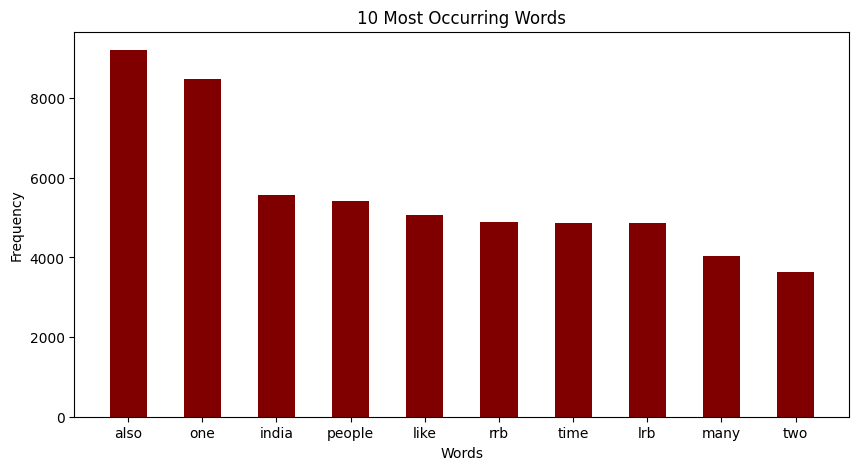

In [142]:
english_words = list(english_histogram_list.keys())
english_frequencies = list(english_histogram_list.values())

fig = plt.figure(figsize = (10, 5))
plt.bar(english_words, english_frequencies, color ='maroon', width = 0.5)
english_labels = list(english_histogram_list.keys())

x = [0, 1,2, 3, 4, 5, 6, 7, 8, 9]

plt.xticks(ticks=x,labels=english_labels)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("10 Most Occurring Words")
plt.show()

In [143]:
font_prop = FontProperties(fname='/content/Mangal_400.ttf', size=18)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


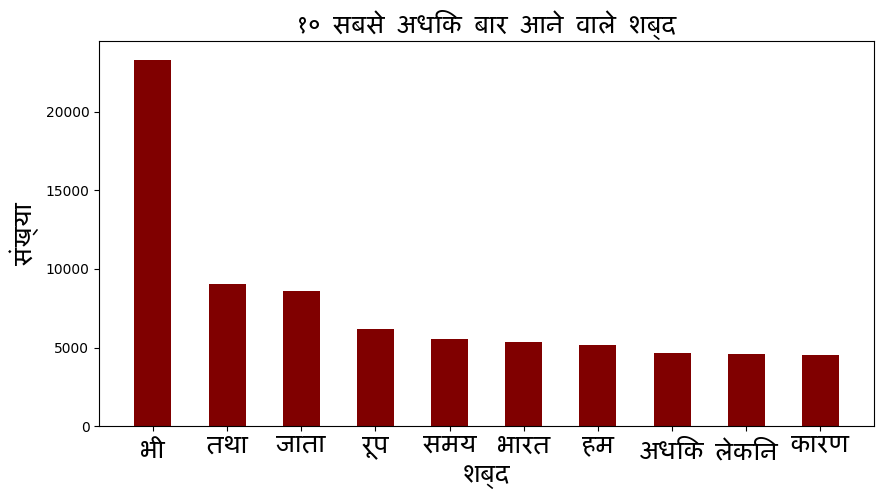

In [144]:
hindi_words = list(hindi_histogram_list.keys())
hindi_frequencies = list(hindi_histogram_list.values())

fig = plt.figure(figsize = (10, 5))

# matplotlib.font_manager import FontProperties
# creating the bar plot
plt.bar(hindi_words, hindi_frequencies, color ='maroon', width = 0.5)
hindi_labels = list(hindi_histogram_list.keys())

x = [0, 1,2, 3, 4, 5, 6, 7, 8, 9]

plt.xticks(ticks=x,labels=hindi_labels,fontproperties=font_prop)
plt.xlabel("शब्द", fontproperties=font_prop)
plt.ylabel("संख्या", fontproperties=font_prop)
plt.title("१० सबसे अधिक बार आने वाले शब्द", fontproperties=font_prop)
plt.show()

## **Image Data**

In [14]:
# Loading the image data
image_class_labels = ['airplanes', 'cars', 'elephant','random','robots']  # List of class labels
image_data_directories = ['/content/IMAGE_DATA/IMAGE_DATA/AIRPLANE',
                          '/content/IMAGE_DATA/IMAGE_DATA/CARS',
                          '/content/IMAGE_DATA/IMAGE_DATA/ELEPHANTS',
                          '/content/IMAGE_DATA/IMAGE_DATA/RANDOM',
                          '/content/IMAGE_DATA/IMAGE_DATA/ROBOTS']



In [15]:
image_data = []
count = 0
for class_label, data_dir in zip(image_class_labels, image_data_directories):
    for image_filename in os.listdir(data_dir):
        image_path = os.path.join(data_dir, image_filename)
        image = Image.open(image_path).convert('L')

        count+=1

        # Resizing the image to (256x256)
        image.resize((256, 256))

        image_data.append({'image': image, 'class': class_label})


In [16]:
image_df = pd.DataFrame(image_data)
# image_df = image_df.sample(frac=1).reset_index(drop=True) # Shuffle the dataset

In [17]:
# Viewing the dimensions of the dataframe
image_df.shape, count

((120, 2), 120)

In [18]:
# Viewing the dataframe
image_df

image      class
0    <PIL.Image.Image image mode=L size=100x100 at ...  airplanes
1    <PIL.Image.Image image mode=L size=100x100 at ...  airplanes
2    <PIL.Image.Image image mode=L size=184x275 at ...  airplanes
3    <PIL.Image.Image image mode=L size=100x100 at ...  airplanes
4    <PIL.Image.Image image mode=L size=183x275 at ...  airplanes
..                                                 ...        ...
115  <PIL.Image.Image image mode=L size=100x100 at ...     robots
116  <PIL.Image.Image image mode=L size=100x100 at ...     robots
117  <PIL.Image.Image image mode=L size=100x100 at ...     robots
118  <PIL.Image.Image image mode=L size=100x100 at ...     robots
119  <PIL.Image.Image image mode=L size=100x100 at ...     robots

[120 rows x 2 columns]

### **Checking if Data is balanced or not**

In [19]:
class_distribution = image_df['class'].value_counts()
print(class_distribution)

elephant     39
robots       21
airplanes    20
cars         20
random       20
Name: class, dtype: int64


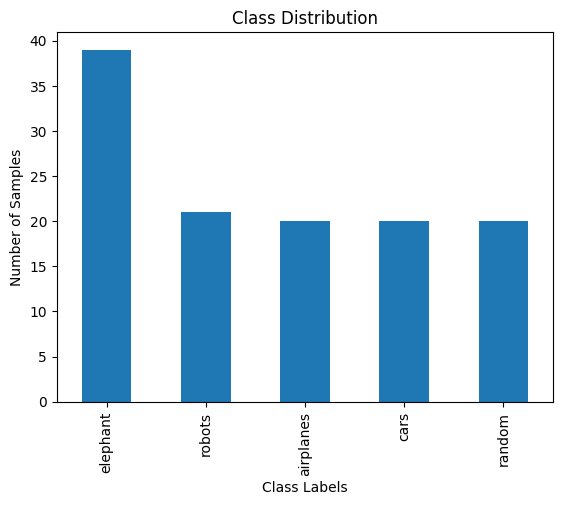

In [20]:
# Creating a bar plot to visualize data distribution
class_distribution.plot(kind='bar')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()

# # Creating a pie chart
# class_distribution.plot(kind='pie', autopct='%1.1f%%')
# plt.title('Class Distribution')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.show()


We can see that the class distribution is as follows:  

| **Class**|**Number**|
|----------|-------|
| elephant |  39   |
| robots   |  21   |
| airplanes|  20   |
| cars     |  20   |
| random   |  20   |


Therefore, majorly only the elephant class is causing the dataset to be imbalanced as there are almost `1.5x times` the number of elephant images as compared to the rest of the classes.


### **How to deal with imbalanced data**

Some possible solutions to dealing with imbalanced data are:
1. **Collecting More Data**: Gathering more samples for the underrepresented classes. This will balance out the dataset and provide the model with a better representation of all classes.  
2. **Data Augmentation**: Generate new samples for the underrepresented classes using data augmentation techniques like rotation, flipping, scaling, and cropping. This can also help increase the diversity of the dataset.  
3. **Resampling Techniques**: Two common approaches are -
  1. **Oversampling** by increasing the number of samples in the minority class by duplicating or generating new samples.  
  2. **Undersampling** to reduce the number of samples in the majority class by randomly removing samples.

In [21]:
# # Function to generate pseudo-random numbers between 1 and 120 using an LCG
# def custom_lcg_range(seed, a, c, m, min_val, max_val):
#     while True:
#         seed = (a * seed + c) % m
#         yield min_val + seed % (max_val - min_val + 1)

# # Initialize the custom LCG random number generator
# seed_value = 41
# a = 1664525
# c = 1013904223
# m = 2**32
# min_value = 1
# max_value = 120
# random_indices = custom_lcg_range(seed_value, a, c, m, min_value, max_value)

# # Generate "random" numbers between 1 and 120
# for _ in range(5):
#     print(next(random_indices))


### Plotting histograms

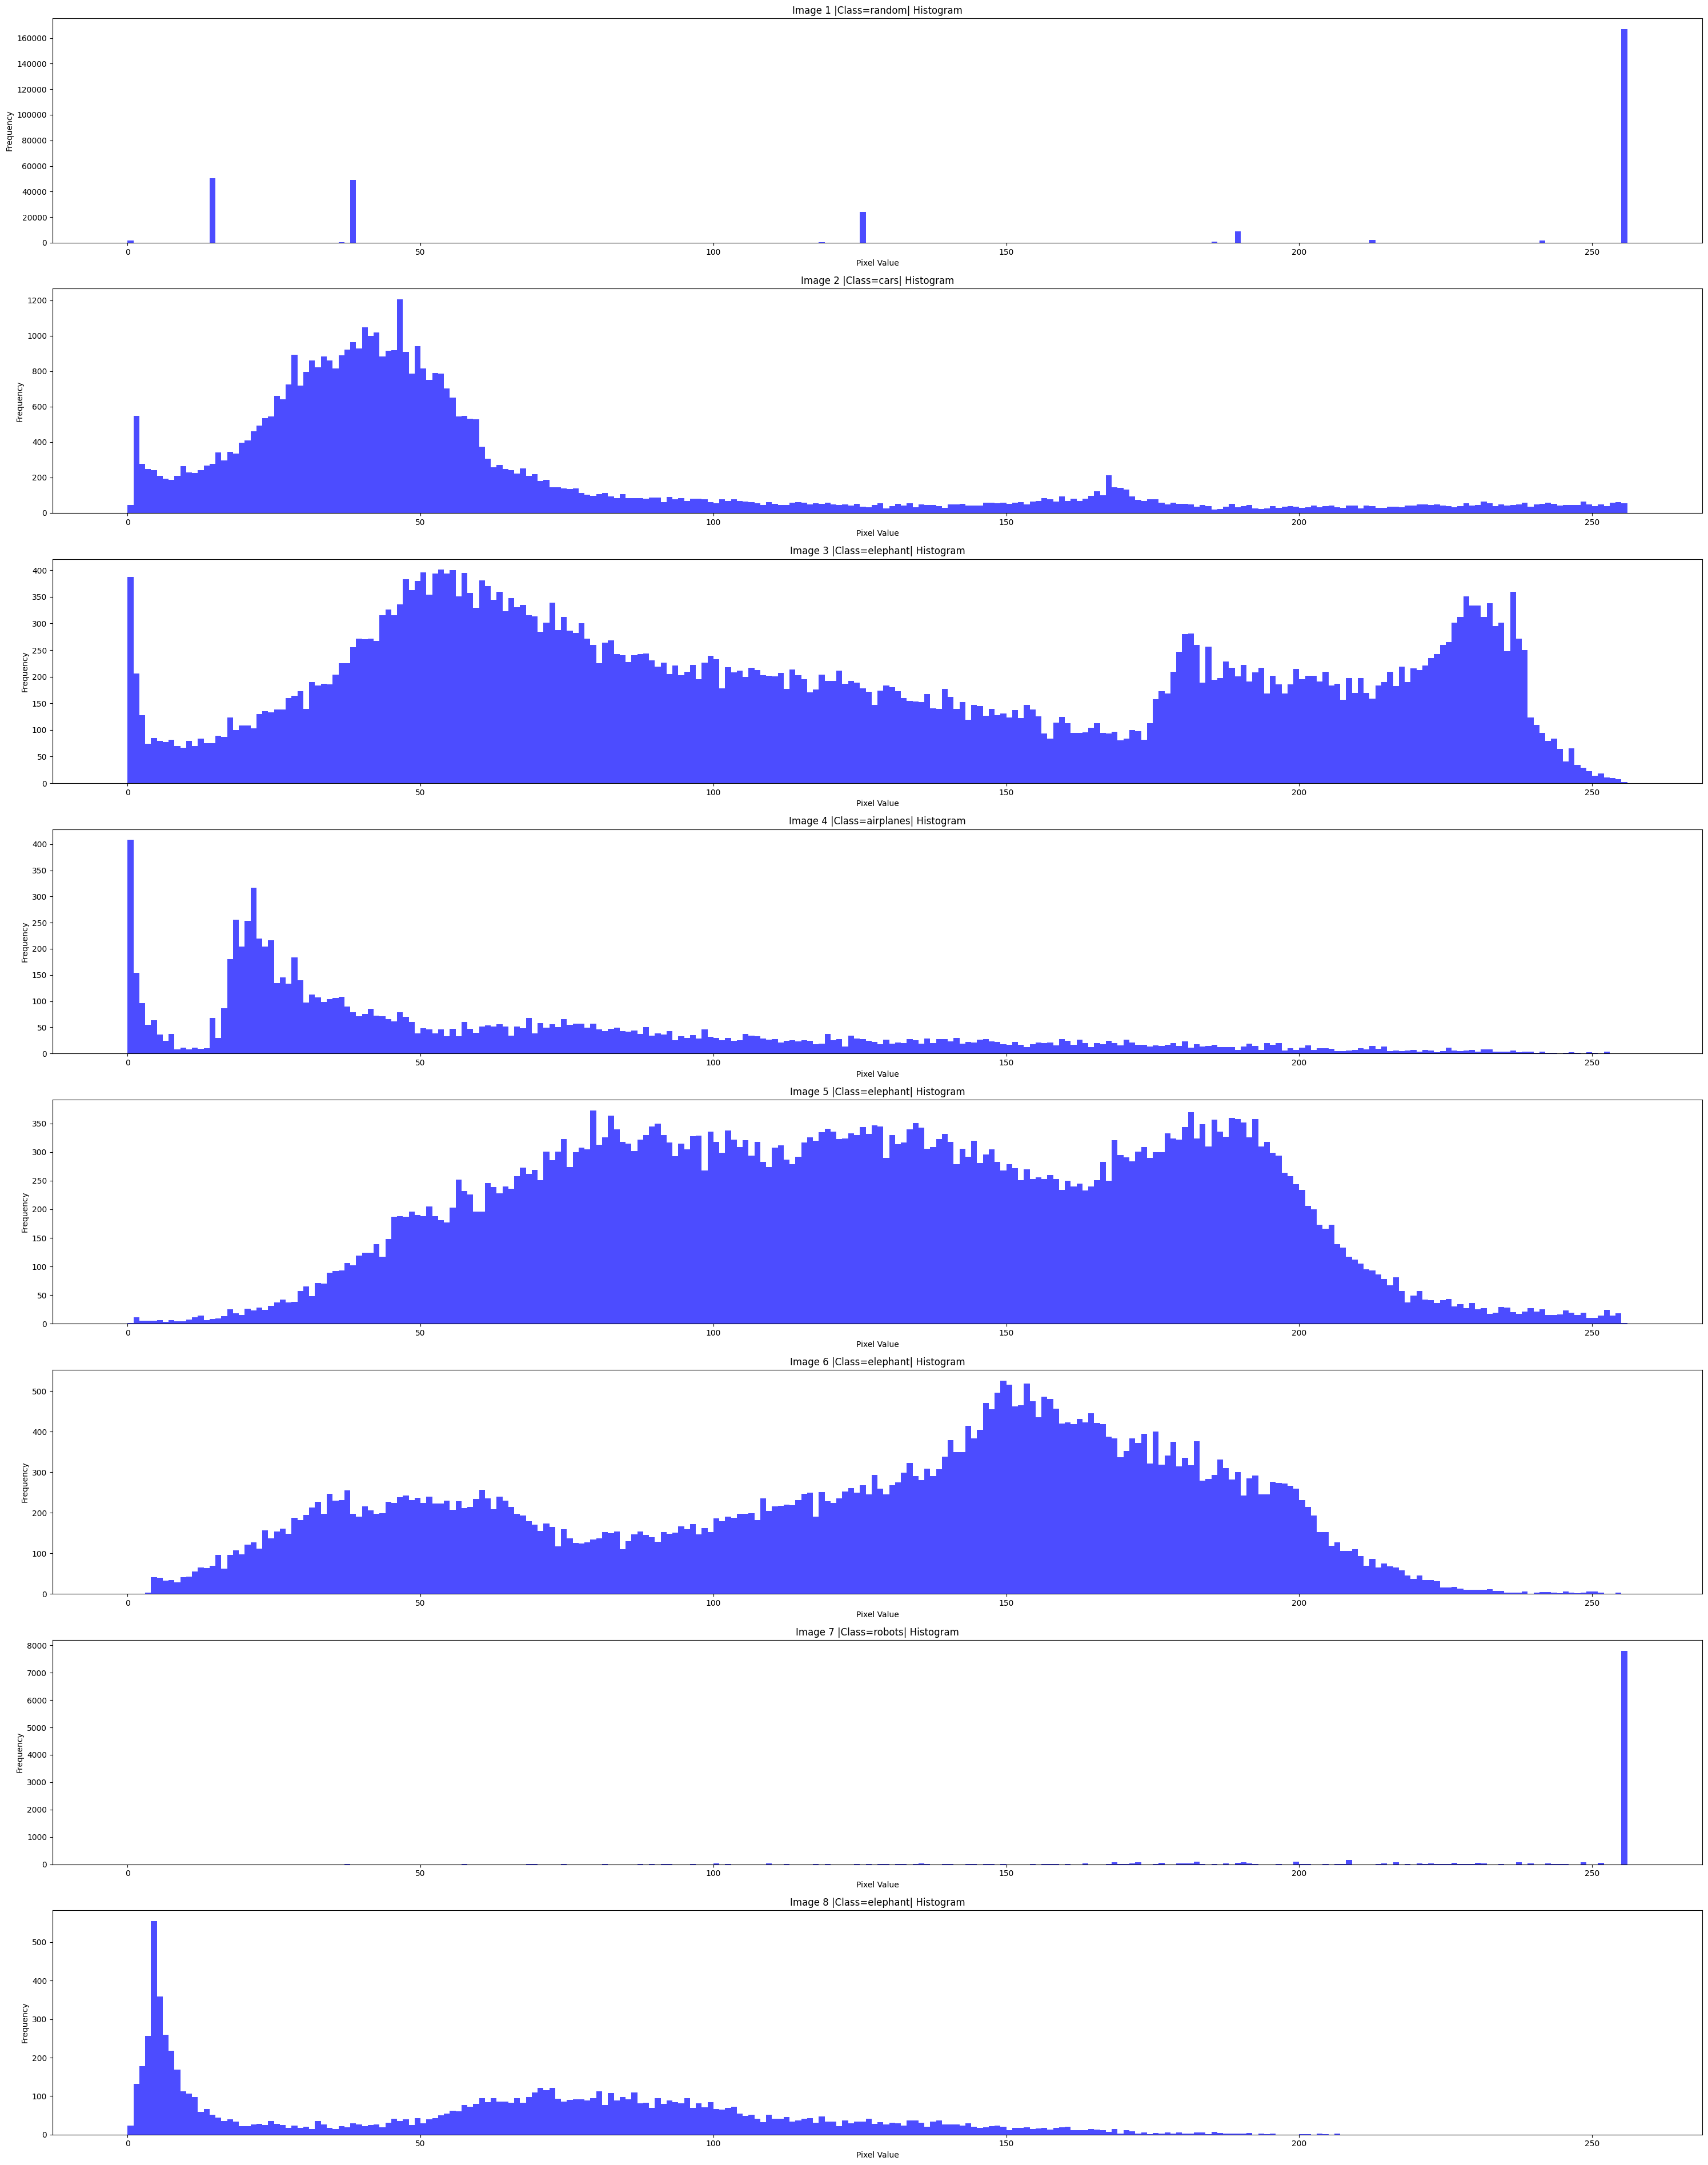

In [22]:
# Fetching images using the random numbers generated as index numbers
random_indices = list(linear_congruential_generator(50,0,119,8))
random_selected_images = []
for i in random_indices:
  image = image_df.iloc[i,:]
  random_selected_images.append({'image': image[0], 'class': image[1]})

random_selected_images_df = pd.DataFrame(random_selected_images)


# Loading images as a NumPy array
histogram_images = np.array(random_selected_images_df['image'])


# Plot histograms for each image
plt.figure(figsize=(30,38))
count = 0
for i, image in enumerate(histogram_images, start=1):
    plt.subplot(len(histogram_images), 1, i)
    histogram, bins = np.histogram(np.ravel(image), bins=256, range=(0, 256))
    plt.hist(np.ravel(image), bins=256, range=(0, 256), color='b', alpha=0.7)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title("Image "+str(i)+" |Class="+str(random_selected_images_df.loc[count,'class'])+"| Histogram")
    # plt.legend()

    count += 1


plt.tight_layout()
plt.show()

In [23]:
# # Testing out
# image_df.iloc[1,:]

# #random_selected_images[0]['image']
# np.ravel(random_selected_images[0]['image'])

### Mean and Variance

In [24]:
image_data = []
class_statistics = {}
count = 0
for class_label, data_dir in zip(image_class_labels, image_data_directories):
    pixel_list = []
    for image_filename in os.listdir(data_dir):
        image_path = os.path.join(data_dir, image_filename)
        image = Image.open(image_path).convert("L")
        #grayscale_image = image
        count+=1
        image.resize((256, 256))
        pixel_list.extend(np.array(image).flatten())


    class_statistics[class_label] = (np.mean(pixel_list), np.var(pixel_list))



for i in class_statistics:
    print(f"Class: {i}")
    print(f"Mean: {class_statistics[i][0]}")
    print(f"Variance: {class_statistics[i][1]}")
    print()

Class: airplanes
Mean: 142.4746926070039
Variance: 4116.415466928856

Class: cars
Mean: 100.25123550019462
Variance: 6186.911062116979

Class: elephant
Mean: 123.57006727378106
Variance: 4304.890325996271

Class: random
Mean: 168.85094840494793
Variance: 10682.828549409753

Class: robots
Mean: 145.356715449693
Variance: 7097.910015634777



### What do I deduce from this mean and variance of the data


**Mean:** The mean of an image dataset give us the average value of all pixel intensities across all images. It is an indication of the overall brightness of the images. If the mean is high, it implies that the images are generally brighter, while a lower mean implies darker images.

**Variance:** The variance of an image dataset measures the spread of pixel values around the mean. A high variance suggests that pixel intensities have a wide range of values.

In our case, we can see that the `RANDOM Class` has the highest average pixel value `(168.85094)` and the highest variance `(10682.8285)` which indicates that the pixels are bright and have a wide range of values. This is also visible clearly when we view an image from the RANDOM class.

The `ROBOTS Class` is also similar in that it has a high pixel average and variance and thus displays properties similar to those of the `RANDOM Class`. This makes sense since robots come in all shapes and sizes.

The `AIRPLANE Class` is has a high pixel average but relatively low variance. Thus, the pixels are more similar (compared to other classes) but are brighter. This makes sense since most airplanes are of a similar type.


The `ELEPHANTS Class` is similar to `AIRPLANE Class` in that it has a high pixel average but relatively low variance and thus displays properties similar to those of the `AIRPLANE Class`. This makes sense since most elephants look the same.



The `CAR Class` is also similar in that it has a relatively low pixel average and slightly higher variance. This makes sense since cars have more variety than ROBOTS and AIRPLANES but lesser compared to the other classes.





In [48]:
# class_stats = {}  # Dictionary to store mean and variance for each class
# class_arrays = {}

# for index, row in image_df.iterrows():
#     # Calculate mean and variance of pixel values for the current class
#     new_image = row['image'].resize((256,256))
#     new_class = row['class']

#     if new_class not in class_arrays:
#       class_arrays[new_class] = []
#       class_arrays[new_class].extend(np.array(new_image).flatten())

#     else:
#       class_arrays[new_class].extend(np.array(new_image).flatten())

#     # pixel_values = np.array(row['image'])
#     # mean = np.mean(pixel_values)
#     # variance = np.var(pixel_values)
#     # label = row['class']
#     # print(row)

#     # class_stats[label] = {'mean': mean, 'variance': variance}

# # Display the calculated statistics for each class
# for label, array in class_arrays.items():
#     print(label,array)
#     print(f"Class: {label}")
#     print(f"Mean: {np.mean(array)}")
#     print(f"Variance: {np.var(array)}")
#     print()



In [49]:
# image_df.head() # JLT
# image_df.at[98,'image']

In [31]:
# random_selected_images_df['image'] # JLT

In [32]:
# histogram_images[4] # JLT

In [33]:
# for image in histogram_images: # JLT
#   print(image)

### Standardising the Data

In [34]:
image_df[image_df["class"] == "random"] # get the subset of text_data using the random numbers

image   class
79  <PIL.Image.Image image mode=L size=640x480 at ...  random
80  <PIL.Image.Image image mode=L size=640x480 at ...  random
81  <PIL.Image.Image image mode=L size=640x480 at ...  random
82  <PIL.Image.Image image mode=L size=640x480 at ...  random
83  <PIL.Image.Image image mode=L size=640x480 at ...  random
84  <PIL.Image.Image image mode=L size=640x480 at ...  random
85  <PIL.Image.Image image mode=L size=640x480 at ...  random
86  <PIL.Image.Image image mode=L size=640x480 at ...  random
87  <PIL.Image.Image image mode=L size=640x480 at ...  random
88  <PIL.Image.Image image mode=L size=640x480 at ...  random
89  <PIL.Image.Image image mode=L size=640x480 at ...  random
90  <PIL.Image.Image image mode=L size=640x480 at ...  random
91  <PIL.Image.Image image mode=L size=640x480 at ...  random
92  <PIL.Image.Image image mode=L size=640x480 at ...  random
93  <PIL.Image.Image image mode=L size=640x480 at ...  random
94  <PIL.Image.Image image mode=L size=640x480 at ...  random
95  <PIL.Image.Image image mode=L size=640x480 at ...  random
96  <PIL.Image.Image image mode=L size=640x480 at ...  random
97  <PIL.Image.Image image mode=L size=640x480 at ...  random
98  <PIL.Image.Image image mode=L size=640x480 at ...  random

In [35]:
image_data_RANDOMCLASS_subset = image_df[image_df["class"] == "random"] # get the subset of text_data using the random numbers
random_numbers_RANDOMCLASS = linear_congruential_generator(42, 0, 20, 4)
image_data_RANDOMCLASS_subset = image_data_RANDOMCLASS_subset.iloc[list(random_numbers_RANDOMCLASS)]

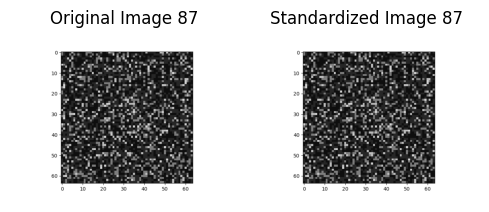

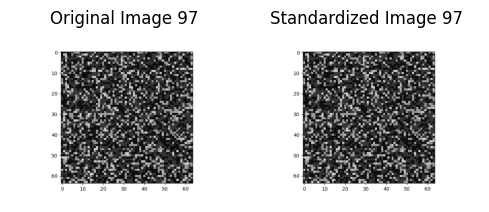

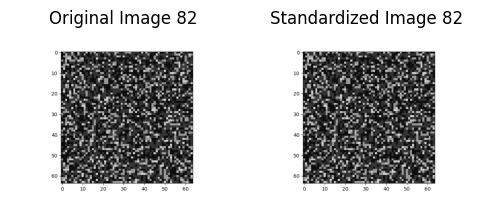

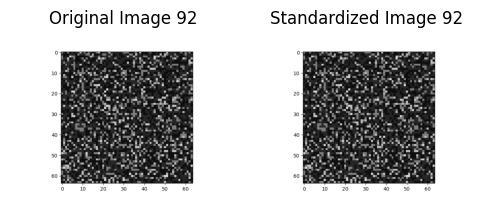

In [46]:
original_image_list = []
standardized_image_list = []

for index, row in image_data_RANDOMCLASS_subset.iterrows():


  # Opening the original image and converting to greyscale
  #original_image_path = row['image']
  original_image = row['image']
  original_image.convert("L")


  original_image_array = np.array(original_image)
  original_image_list.append(original_image_array)

  # Standardising the image
  mean = np.mean(original_image_array)
  std = np.std(original_image_array)
  standardized_image = (original_image_array - mean) / std
  standardized_image_list.append(standardized_image)

  # Creating a figure with subplots
  fig, axes = plt.subplots(1, 2, figsize=(5, 5))

  # Displaying the original image
  axes[0].imshow(original_image_array, cmap='gray')
  axes[0].set_title('Original Image {i}'.format(i=index))
  axes[0].axis('off')

  # Displaying the standardized image
  axes[1].imshow(standardized_image, cmap='gray')
  axes[1].set_title('Standardized Image {i}'.format(i=index))
  axes[1].axis('off')

  # Adjusting the layout and displaying the plot
  plt.tight_layout()
  plt.show()

In [37]:
print(original_image_list[0])
print()
print()
print(standardized_image_list[0])

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


[[0.85010582 0.85010582 0.85010582 ... 0.85010582 0.85010582 0.85010582]
 [0.85010582 0.85010582 0.85010582 ... 0.85010582 0.85010582 0.85010582]
 [0.85010582 0.85010582 0.85010582 ... 0.85010582 0.85010582 0.85010582]
 ...
 [0.85010582 0.85010582 0.85010582 ... 0.85010582 0.85010582 0.85010582]
 [0.85010582 0.85010582 0.85010582 ... 0.85010582 0.85010582 0.85010582]
 [0.85010582 0.85010582 0.85010582 ... 0.85010582 0.85010582 0.85010582]]


### Difference between Original and Standardized Data

As such there is no significant visible difference between the original images and the standardised images.  
However, if we look carefully, we can notice that the standardised images have a slightly darker tint compared to the original images.  
This is consistent with the fact that if the mean of the pixel values (which is 169.85094 for the RANDOM class) is higher than the midpoint of the pixel range (pixel range is from 0-255), subtracting the mean can lead to a darker appearance since pixel values are being reduced.  


While the visual differences are minor, there is significant difference between how the two images are stored (as can be seen above).
This change in the array values helps in:
1. Reduce the impact of outliers or extreme pixel values.
2. Centering around 0 simplifies the optimization process during training
3. Reduces the sensitivity of the model to the intensity or brightness of the image and makes the model focus more on the patterns and features of the images.


### Image Transformations

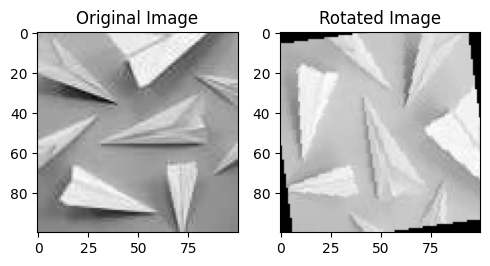

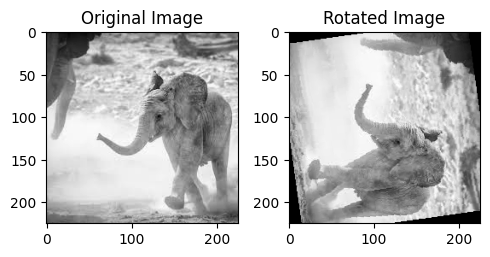

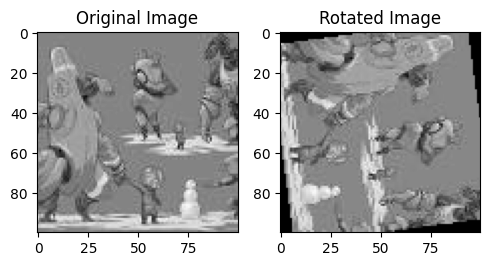

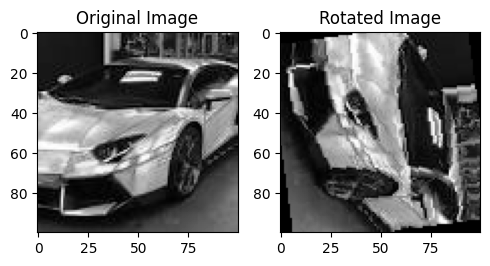

In [51]:
random_number_list = linear_congruential_generator(42, 0, 119, 4)

for i in random_number_list:

  image = image_df.loc[i,'image']
  image.convert('L')

  angle = list(linear_congruential_generator(42,60,361,1))[0]  # Random rotation angle between 60 and 360 degrees
  rotated_image = image.rotate(angle)

  plt.figure(figsize=(5, 5))
  plt.subplot(1, 2, 1)
  plt.imshow(image, cmap='gray')
  plt.title('Original Image')

  plt.subplot(1, 2, 2)
  plt.imshow(rotated_image, cmap='gray')
  plt.title('Rotated Image')

  plt.tight_layout()
  plt.show()




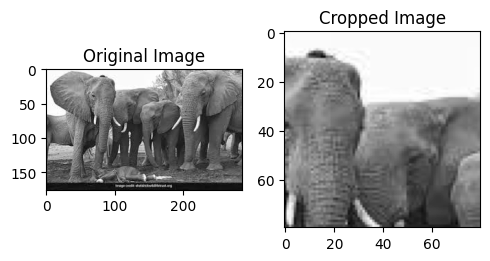

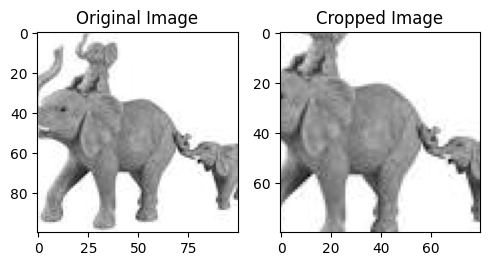

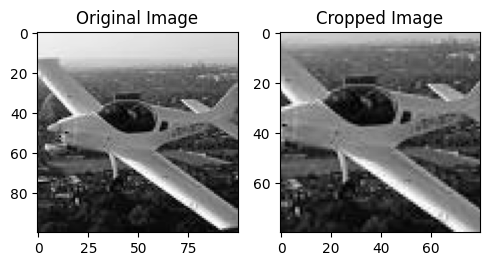

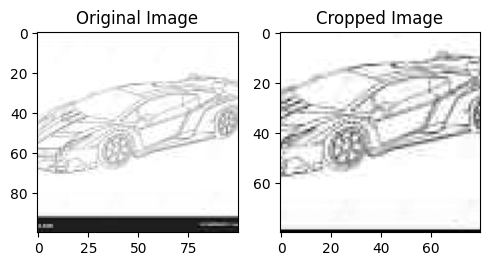

In [52]:
random_number_list = linear_congruential_generator(57, 0, 119, 4)

for i in list(random_number_list):

  image = image_df.loc[i,'image']


  crop_width = 80
  crop_height = 80
  width, height = image.size
  x = list(linear_congruential_generator(42,0, width - crop_width,1))[0]
  y = list(linear_congruential_generator(42,0, height - crop_height,1))[0]
  cropped_image = image.crop((x, y, x + crop_width, y + crop_height))

  plt.figure(figsize=(5, 5))
  plt.subplot(1, 2, 1)
  plt.imshow(image, cmap='gray')
  plt.title('Original Image')


  plt.subplot(1, 2, 2)
  plt.imshow(cropped_image, cmap='gray')
  plt.title('Cropped Image')

  plt.tight_layout()
  plt.show()



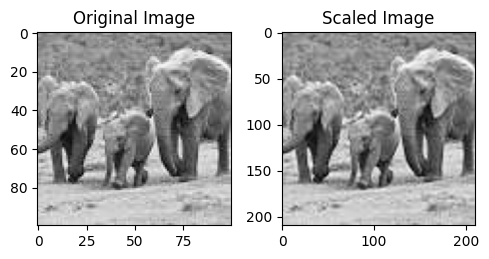

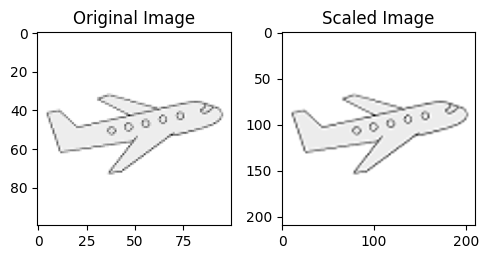

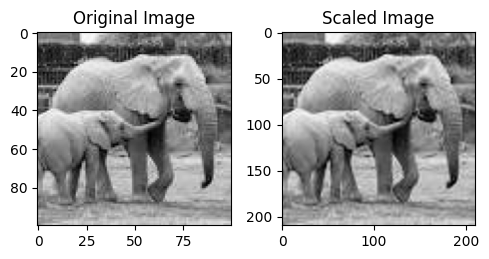

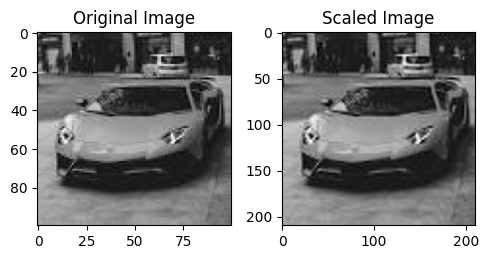

In [53]:
random_number_list = linear_congruential_generator(53 , 0, 119, 4)

for i in list(random_number_list):

  image = image_df.loc[i,'image']

  scale_factor = list(linear_congruential_generator(42,8,20,1))[0]/10  # Random scale factor between 0.5 and 2
  #scale_factor = 2
  new_width = int(image.width * scale_factor)
  new_height = int(image.height * scale_factor)
  scaled_image = image.resize((new_width, new_height))

  plt.figure(figsize=(5, 5))
  plt.subplot(1, 2, 1)
  plt.imshow(image, cmap='gray')
  plt.title('Original Image')

  plt.subplot(1, 2, 2)
  plt.imshow(scaled_image, cmap='gray')
  plt.title('Scaled Image')

  plt.tight_layout()
  plt.show()



In [41]:
# print(linear_congruential_generator(42,8,12,1)) # JLT

## Audio Data

In [54]:
# Loading the audio data
audio_class_labels = ['1', '2', '3','4','5']  # List of class labels
audio_data_directories = ['/content/AUDIO_DATA/AUDIO_DATA/CLASS 1',
                          '/content/AUDIO_DATA/AUDIO_DATA/CLASS 2',
                          '/content/AUDIO_DATA/AUDIO_DATA/CLASS 3',
                          '/content/AUDIO_DATA/AUDIO_DATA/CLASS 4',
                          '/content/AUDIO_DATA/AUDIO_DATA/CLASS 5']



In [56]:
# Converting all files to .wav to ensure consistency of file formats
for audio_dir in audio_data_directories:
    for filename in os.listdir(audio_dir):
        if filename.endswith('.mp3'):
            file_path = os.path.join(audio_dir, filename)

            input_mp3 = file_path # .mp3 file path
            output_wav = file_path+str(".wav")  # new .wav file path

            subprocess.run(["ffmpeg", "-i", input_mp3, output_wav])

            os.remove(input_mp3) # removing the .mp3 files




In [57]:
# Empty DataFrame to store audio information
audio_data = pd.DataFrame(columns=['file_path', 'class_label', 'duration', 'sample_rate'])


# Iterating through audio files
class_no = 0
for audio_dir in audio_data_directories:
    class_no+=1
    for filename in os.listdir(audio_dir):
        if filename.endswith('.wav') or filename.endswith('.mp3'):  # since we have only wav files and mp3 files
            # the above line can be removed as well if we are certain that the directory contains only audio files

            file_path = os.path.join(audio_dir, filename)

            # Loading audio data
            audio, sample_rate = librosa.load(file_path, sr=None)

            # Setting a class label based on which directory we are in
            class_label = class_no

            # Calculate duration
            duration = librosa.get_duration(y=audio, sr=sample_rate)

            # Append information to the DataFrame
            audio_data = audio_data.append({
                'file_path': file_path,
                'class_label': class_label,
                'duration': duration,
                'sample_rate': sample_rate
            }, ignore_index=True)



<ipython-input-57-3391e5c50858>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  audio_data = audio_data.append({
<ipython-input-57-3391e5c50858>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  audio_data = audio_data.append({
<ipython-input-57-3391e5c50858>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  audio_data = audio_data.append({
<ipython-input-57-3391e5c50858>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  audio_data = audio_data.append({
<ipython-input-57-3391e5c50858>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  audio_data = 

In [58]:
# Display the loaded audio data
print(audio_data.head())

                                           file_path class_label    duration  \
0    /content/AUDIO_DATA/AUDIO_DATA/CLASS 1/0020.wav           1    1.338937   
1    /content/AUDIO_DATA/AUDIO_DATA/CLASS 1/0014.wav           1    2.634688   
2  /content/AUDIO_DATA/AUDIO_DATA/CLASS 1/speech-...           1  205.061250   
3    /content/AUDIO_DATA/AUDIO_DATA/CLASS 1/0023.wav           1    0.950250   
4    /content/AUDIO_DATA/AUDIO_DATA/CLASS 1/0022.wav           1    3.124188   

  sample_rate  
0       16000  
1       16000  
2       16000  
3       16000  
4       16000  


In [59]:
# Viewing how many entries are in the dataset
len(audio_data)

56

In [60]:
# Viewing the shape/dimensions of the dataframe
audio_data.shape

(56, 4)

### Checking if Data is balanced or not

In [61]:
class_distribution = audio_data['class_label'].value_counts()
print(class_distribution)

3    16
1    10
2    10
4    10
5    10
Name: class_label, dtype: int64


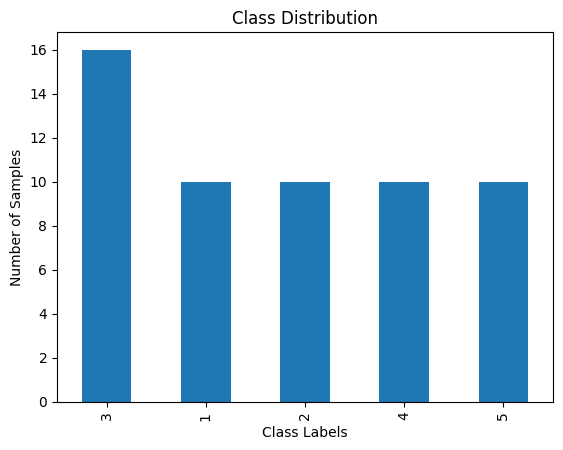

In [62]:
# Creating a bar plot to visualize data distribution
class_distribution.plot(kind='bar')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()


### Mean length of audio file for each class

In [63]:
mean_length = {} # to get the total duration of audio samples in each class
number_of_instances = {} # to get the number of instances of each class

for i in range(len(audio_data)):
  if audio_data.loc[i,'class_label'] in mean_length:
    mean_length[audio_data.loc[i,'class_label']] += audio_data.loc[i,'duration']
    number_of_instances[audio_data.loc[i,'class_label']] += 1
  else:
    mean_length[audio_data.loc[i,'class_label']] = audio_data.loc[i,'duration']
    number_of_instances[audio_data.loc[i,'class_label']] = 1

for i in range(1,len(mean_length)+1):
  mean_length[i] /= number_of_instances[i]
#print(df.loc[i, "Name"], df.loc[i, "Age"])


In [64]:
for i in mean_length:
  print("Mean length of Class {n} is {mean} seconds".format(n=i,mean=mean_length[i]))

Mean length of Class 1 is 21.9732 seconds
Mean length of Class 2 is 1.8874562499999996 seconds
Mean length of Class 3 is 49.532238600127556 seconds
Mean length of Class 4 is 2.1691 seconds
Mean length of Class 5 is 2.3024125 seconds


### How to deal with imbalanced data

#### **Number of samples available**  

| **Class**|**Number**|
|----------|-------|
| 1 |  10   |
| 2 |  10   |
| 3 |  16   |
| 4 |  10   |
| 5 |  10   |


As we can see, there are 16 files of `Class 3` whereas the other classes have 10 files each.
Therefore, `Class 3` has 1.6x times more files than the other classes and the dataset is imbalanced.

#### **Audio Duration**

There is also an imbalance in the audio data on the basis of audio length.

| **Class**|**Duration in s**|
|----------|-------|
| 1 |  21.9732   |
| 2 |  1.8874   |
| 3 |  49.5532   |
| 4 |  2.1691   |
| 5 |  2.3024   |


Clearly, the mean length of audio files of `Class 1` and `Class 3` is significantly higher compared to the rest of the classes.  


We can deal with an imbalanced audio dataset in the following ways:  
1. **Data Augmentation:** Augment the minority class by creating new samples through techniques like trimming, pitch shifting, and speed variation. This increases the diversity of the minority class and helps in prevention of overfitting to the majority class.
2. **Weighted Loss Functions:** In weighted loss functions we assign different weights to the classes based on their prevalence in the dataset. They allow us to give more importance to the minority class during training, thereby helping the model focus on correctly classifying the underrepresented class.
3. **Resampling Techniques:** Two common methods are:
  1. **Oversampling:** Duplicate samples from the minority class to balance it with the majority class.
  2. **Undersampling:** Randomly remove samples from the majority class to balance it with the minority class.
4. **Custom Metrics:** Use evaluation metrics that are sensitive to class imbalance, such as precision, recall, F1-score, etc.



### **Spectrogram**

In [65]:
random_list_4 = linear_congruential_generator(42,1,55,4) # get a set of 4 random numbers

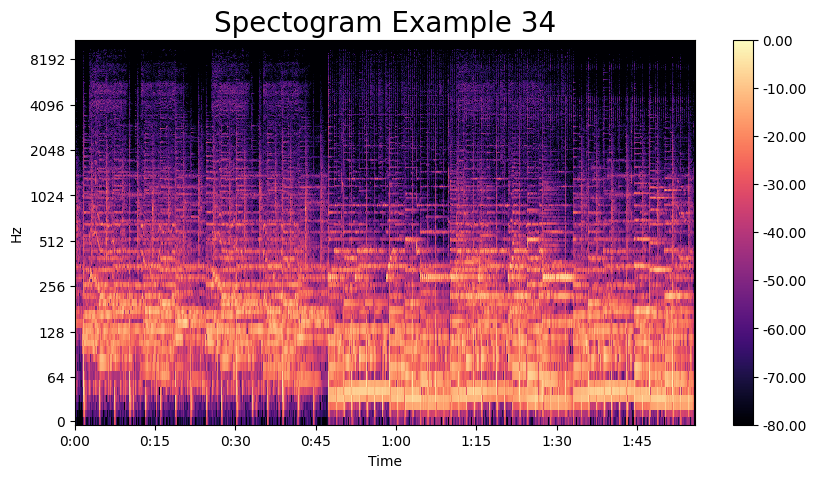

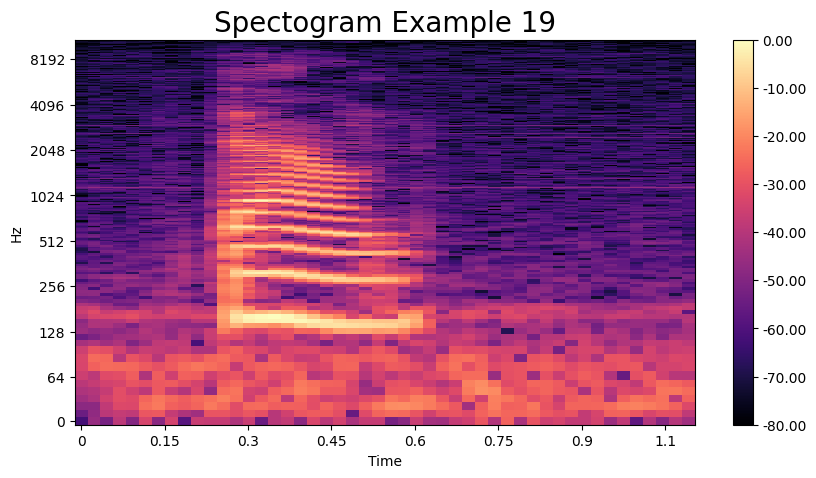

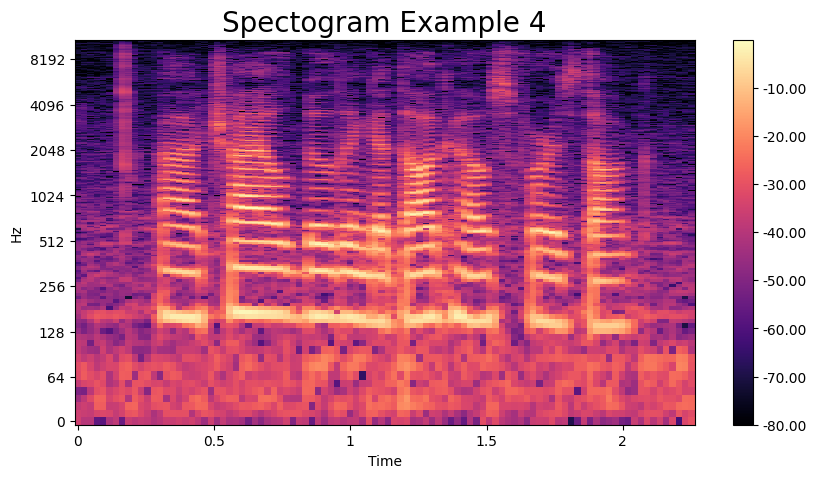

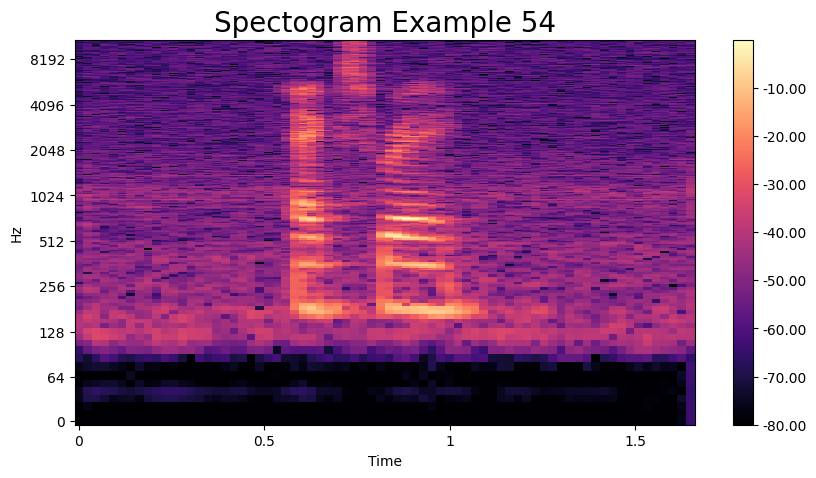

In [66]:
# Loading audio data

audio_data_subset = audio_data.loc[list(random_list_4)]
for index,row in audio_data_subset.iterrows():

  audio, sample_rate = librosa.load(row['file_path'], sr=None)

  # Plotting the spectogram
  D = librosa.stft(audio)
  S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
  S_db.shape

  #plt.figure(figsize=(10, 5))
  #plt.subplot(1, 2, 1)
  # Plot the transformed audio data
  fig, ax = plt.subplots(figsize=(10, 5))
  img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
  ax.set_title('Spectogram Example {indexx}'.format(indexx=index), fontsize=20)
  fig.colorbar(img, ax=ax, format=f'%0.2f')
  plt.show()


### Pre-Emphasis Filter

A pre-emphasis filter is a type of signal processing filter applied to audio signals to boost the high-frequency components
relative to the low-frequency components. The primary goal of a pre-emphasis filter is to enhance certain features of the signal and improve its overall quality before further analysis.  
The general formula is:  
`y[n] = x[n] - alpha*x[n-1]  `  
y[n]: is the output signal  
x[n]: is the input signal  
alpha: Is the pre-emphasis coefficient  

The main benefits of using a pre-emphasis filter include:
1. **Improved Music Analysis:** The timbre and texture of sound are often characterized by high-frequency features. A pre-emphasis filter can help preserve these features.

2. **Compensation for Lossy Compression**: Some audio compression algorithms can result in a reduction of high-frequency information. Applying a pre-emphasis filter before compression can help reduce the loss of high-frequency content.

3. **Enhanced Speech Recognition**: High-frequency components often contain crucial information. Emphasizing these components can lead to improved accuracy in recognizing speech.

In [67]:
def pre_emphasis(signal, alpha):
    emphasized_signal = np.append(signal[0], signal[1:] - alpha * signal[:-1])
    return emphasized_signal

In [68]:
# # Just seeing if it works or not
# random_number_list = linear_congruential_generator(42, 0, 55, 4)
# audio_data_subset = audio_data.loc[list(random_number_list)] # get the subset of text_data using the random numbers
# audio_data_subset

In [69]:
# Just viewing an entry in the dataset
audio_signal = audio_data_subset.iloc[1]
audio_signal

file_path      /content/AUDIO_DATA/AUDIO_DATA/CLASS 2/0094.wav
class_label                                                  2
duration                                              1.526063
sample_rate                                              16000
Name: 19, dtype: object

In [70]:
# Just viewing the outputs
audio_, sampling_rate = librosa.load(audio_signal['file_path'])
audio_, sampling_rate

(array([-0.00077213, -0.00101697, -0.0011586 , ..., -0.00024923,
        -0.00038706, -0.0002408 ], dtype=float32),
 22050)

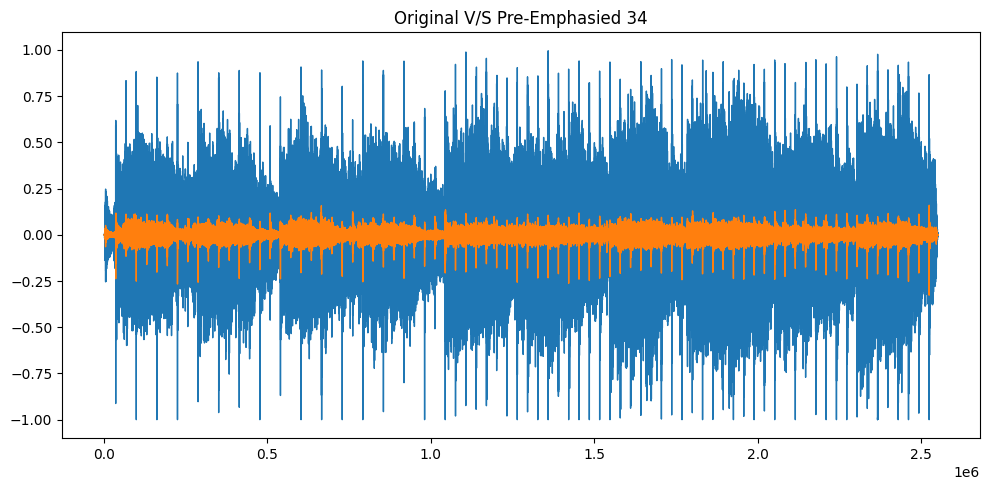

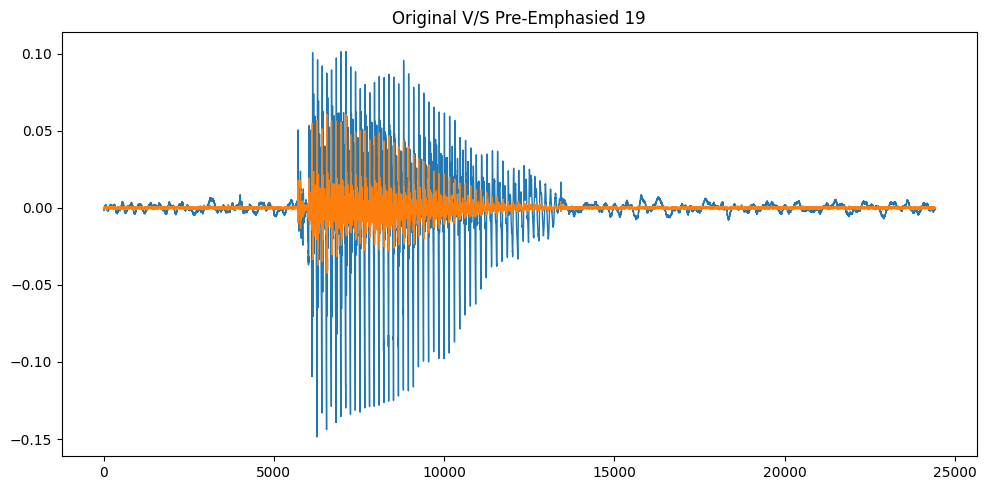

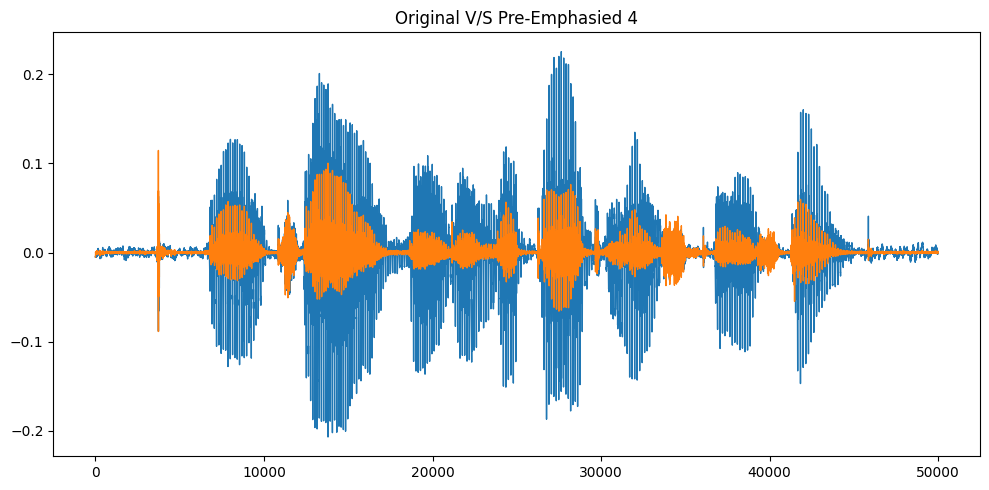

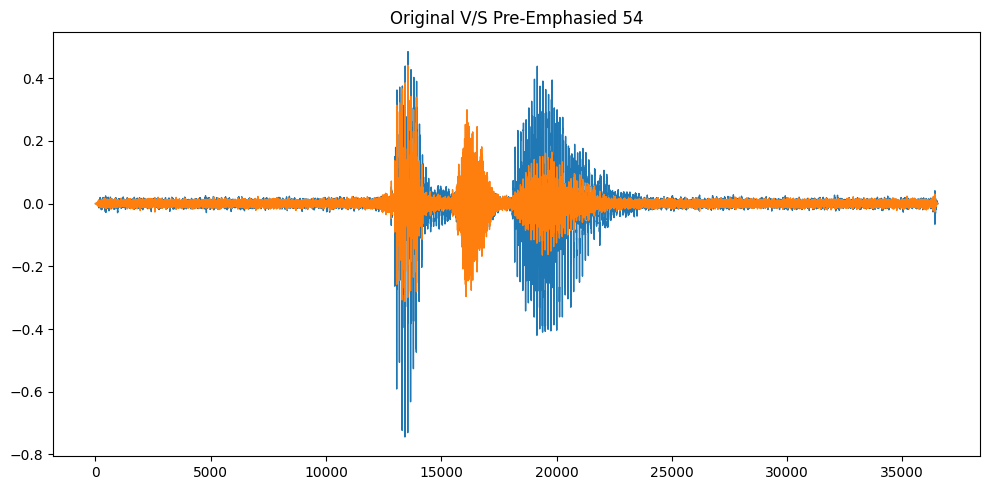

In [71]:
# Loading audio data
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
alpha = 0.95  # Pre-emphasis coefficient

audio_data_subset = audio_data.loc[list(random_list_4)] # get the subset of text_data using the random numbers
xx = 1
yy = 2

for index,row in audio_data_subset.iterrows():

  audio, sample_rate = librosa.load(row['file_path'], sr=None)


  plt.figure(figsize=(10, 10))

  #plt.subplot(4, 2, xx)

  # Plotting raw audio
  pd.Series(audio).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example {i}'.format(i=index),
                 color=color_pal[0])



  emphasized_signal = pre_emphasis(audio, alpha)

  #plt.subplot(4, 2, yy)

  # Plot the emphasized signal
  pd.Series(emphasized_signal).plot(figsize=(10, 5),
                    lw=1,
                    title='Original V/S Pre-Emphasied {i}'.format(i=index),
                  color=color_pal[1])



  #fig, ax = plt.subplots(figsize=(10, 5))

  # Plot the transformed audio data
  xx += 2
  yy += 2

  plt.tight_layout()
  #ax.set_title('Time Domain Example {indexx}'.format(indexx=index), fontsize=20)
  #fig.colorbar(img, ax=ax, format=f'%0.2f')
  plt.show()


### Upsampling and Downsampling Audio

In [133]:
audio_file_q4_path = "/content/AUDIO_DATA/AUDIO_DATA/CLASS 1/speech-librivox-0053.wav"

audio_file_q4, sampling_rate_q4 = librosa.load(audio_file_q4_path, sr=None)

up_sample_rate=40000
down_sample_rate=10000
upsampled_signal = librosa.resample(audio_file_q4, orig_sr=sampling_rate_q4, target_sr=up_sample_rate)
downsampled_signal = librosa.resample(audio_file_q4,orig_sr=sampling_rate_q4,target_sr=down_sample_rate)

# # Upsample the signal
# upsampling_factor = 2
# upsampled_signal = scipy.signal.resample(audio_file_q4, len(audio_file_q4) * upsampling_factor)

# # Downsample the upsampled signal
# downsampling_factor = 2
# downsampled_signal = scipy.signal.decimate(audio_file_q4, downsampling_factor)



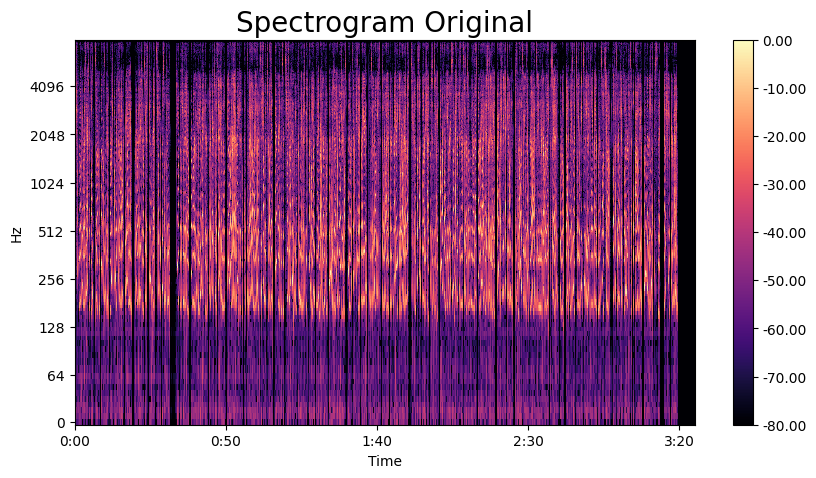

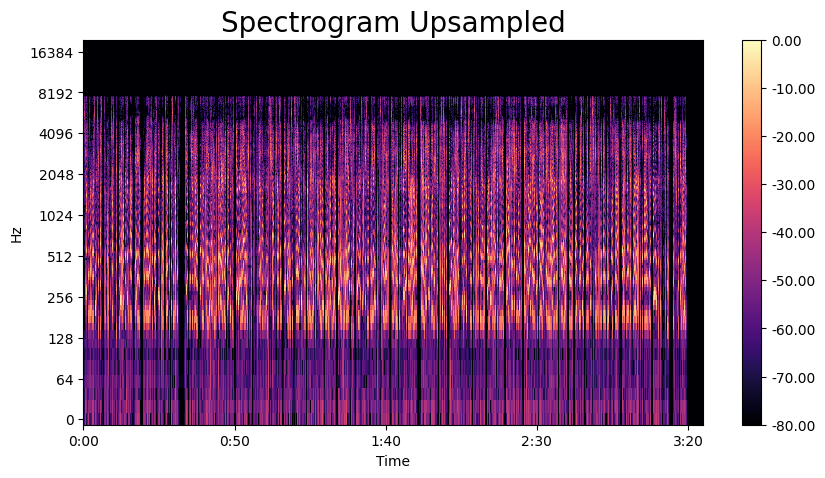

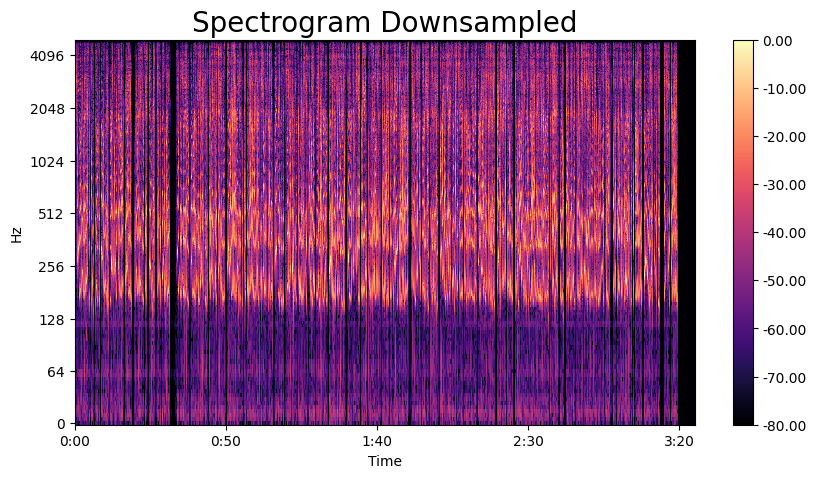

In [134]:
# Plotting the spectogram for the original audio
D_original = librosa.stft(audio_file_q4)
S_db_original = librosa.amplitude_to_db(np.abs(D_original), ref=np.max)


# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img_original = librosa.display.specshow(S_db_original,
                              x_axis='time',
                              y_axis='log',
                              ax=ax,
                              sr = sampling_rate_q4)
ax.set_title('Spectrogram Original', fontsize=20)
fig.colorbar(img_original, ax=ax, format=f'%0.2f')



# Plotting the spectogram for the upsampled audio
D_upsampled = librosa.stft(upsampled_signal)
S_db_upsampled = librosa.amplitude_to_db(np.abs(D_upsampled), ref=np.max)


# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img_upsampled = librosa.display.specshow(S_db_upsampled,
                              x_axis='time',
                              y_axis='log',
                              ax=ax,
                              sr = up_sample_rate)
ax.set_title('Spectrogram Upsampled', fontsize=20)
fig.colorbar(img_upsampled, ax=ax, format=f'%0.2f')


# Plotting the spectogram for the downsampled audio
D_downsampled = librosa.stft(downsampled_signal)
S_db_downsampled = librosa.amplitude_to_db(np.abs(D_downsampled), ref=np.max)


# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img_downsampled = librosa.display.specshow(S_db_downsampled,
                              x_axis='time',
                              y_axis='log',
                              ax=ax,
                              sr = down_sample_rate)
ax.set_title('Spectrogram Downsampled', fontsize=20)
fig.colorbar(img_downsampled, ax=ax, format=f'%0.2f')

plt.show()




The original sampling rate is 16000 Hz.  
The upsampling rate is 40000 Hz.  
The downsampling rate is 10000 Hz.  

We can see in the spectrogram that the orignal range of frequency is from 0 Hz to 4096 Hz, upsampling frequency range is from 0 Hz to 16384 Hz and downsampling frequency range is from 0 Hz to 4096 Hz.

When we `Upsampling` a spectrogram, we increase the number of samples per unit time. The main effect of upsampling is that it provides a finer-grained view of the frequency content over time. Therefore, it should appear to be smoother since we are taking more samples in unit time.
`Downsampling` a spectrogram involves reducing the number of samples per unit of time. In downsampling we are essentially aggregating multiple adjacent time-frequency cells into a single cell, which can lead to loss of information. Therefore, it should appear to be less smooth since we are taking lesser samples in unit time.

In our case in the upsampling spectrogram, there has also been some data loss as there is some black region around the top.


In [74]:
# plt.figure(figsize=(30, 10))

# fig.add_subplot(3, 1, 1)
# pd.Series(audio_file_q4).plot(figsize=(20, 10),
#                   lw=1,
#                   title='Original',
#                  color=color_pal[0])

# fig.add_subplot(3, 1, 2)
# pd.Series(upsampled_signal).plot(figsize=(20, 10),
#                   lw=1,
#                   title='Upsampled',
#                  color=color_pal[2])

# fig.add_subplot(3, 1, 3)
# pd.Series(downsampled_signal).plot(figsize=(20, 10),
#                   lw=1,
#                   title='Downsampled',
#                  color=color_pal[1])

# plt.tight_layout()
# #plt.legend()

# plt.show()


# color_pal[0], color_pal[1], color_pal[2]
# (blue,orange,green)

In [75]:
audio_data.head()

file_path class_label    duration  \
0    /content/AUDIO_DATA/AUDIO_DATA/CLASS 1/0020.wav           1    1.338937   
1    /content/AUDIO_DATA/AUDIO_DATA/CLASS 1/0014.wav           1    2.634688   
2  /content/AUDIO_DATA/AUDIO_DATA/CLASS 1/speech-...           1  205.061250   
3    /content/AUDIO_DATA/AUDIO_DATA/CLASS 1/0023.wav           1    0.950250   
4    /content/AUDIO_DATA/AUDIO_DATA/CLASS 1/0022.wav           1    3.124188   

  sample_rate  
0       16000  
1       16000  
2       16000  
3       16000  
4       16000

### Converting Filetypes

In [82]:
random_list_1 = linear_congruential_generator(42,1,54,1) # get a set of 1 random number
random_list_1

{38}

In [83]:
audio_1 = audio_data.loc[list(random_list_1)]

for index,row in audio_1.iterrows():

  audio, sampling_rate = librosa.load(row["file_path"], sr=None)
  output_file = "repeated.wav"  # Replace with your output audio file

  repeated_audio = audio

  # Repeat the audio by concatenating it with itself in case it is less than 2s
  while (row['duration']<2.0):
    repeated_audio = np.concatenate((audio, audio), axis=0)



  # Save the repeated audio using ffmpeg
  # subprocess.run(['ffmpeg', '-y', '-f', 'wav', '-ar', str(sampling_rate), '-ac', '1', '-i', '-', output_file], input=repeated_audio.tobytes(), stdout=subprocess.PIPE, stderr=subprocess.PIPE)

In [84]:
# Saving the audio file
scipy.io.wavfile.write(output_file, sampling_rate, repeated_audio)

In [85]:
audio_1.iloc[0,0], audio_data.iloc[list(random_list_1)[0],2]

('/content/AUDIO_DATA/AUDIO_DATA/CLASS 4/M08_B1_CW33_M3.wav', 2.2338125)

In [86]:
audio_1_duration = audio_1.iloc[0,2]
if math.floor(audio_1_duration)<=2:
  start_time = 0
else:
  start_time = linear_congruential_generator(42,0,audio_1_duration-2,1)

audio, sampling_rate = librosa.load(audio_1.iloc[0,0], sr=None)

audio_chunk = audio[start_time:start_time+ int(sampling_rate*2)]
scipy.io.wavfile.write("chunk.wav", sampling_rate, audio_chunk)


In [87]:
input_wav = audio_1.iloc[0,0]
output_mp3 = "outputer.mp3"
output_flac = "outputer.flac"

ffmpeg.input(input_wav).output(output_mp3, codec="libmp3lame").run()
ffmpeg.input(input_wav).output(output_flac, codec="flac").run()



(None, None)

In [88]:
file_wav, sampling_rate_wav = librosa.load("/content/chunk.wav")
file_mp3, sampling_rate_mp3 = librosa.load("/content/outputer.mp3")
file_flac, sampling_rate_flac = librosa.load("/content/outputer.flac")



In [89]:
D_wav = librosa.stft(file_wav)
S_db_wav = librosa.amplitude_to_db(np.abs(D_wav), ref=np.max)
S_db_wav.shape

D_mp3 = librosa.stft(file_mp3)
S_db_mp3 = librosa.amplitude_to_db(np.abs(D_mp3), ref=np.max)
S_db_mp3.shape

D_flac = librosa.stft(file_flac)
S_db_flac = librosa.amplitude_to_db(np.abs(D_flac), ref=np.max)
S_db_flac.shape

(1025, 97)

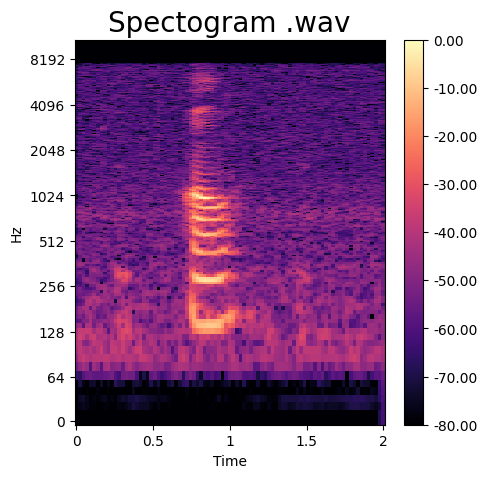

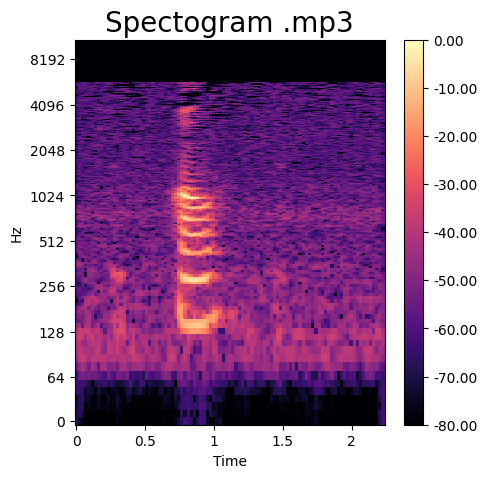

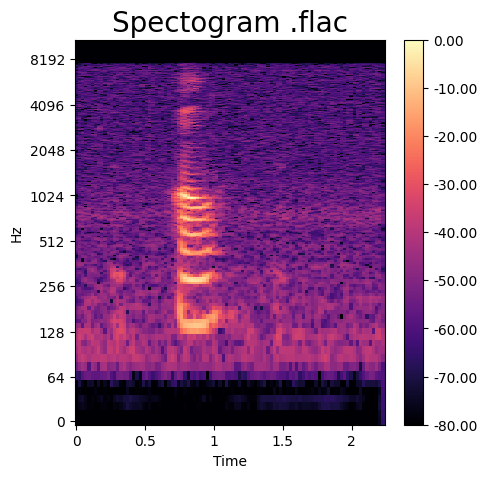

In [90]:
# Plot the transformed audio data -- .wav file

# plt.figure(figsize=(5, 5))

# fig.add_subplot(3, 1, 1)

fig, ax = plt.subplots(figsize=(5, 5))
img = librosa.display.specshow(S_db_wav,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram .wav', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')

# fig.add_subplot(3, 1, 2)

# Plot the transformed audio data -- .mp3 file
fig, ax = plt.subplots(figsize=(5, 5))
img = librosa.display.specshow(S_db_mp3,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram .mp3', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')


# fig.add_subplot(3, 1, 3)

# Plot the transformed audio data -- .flac file
fig, ax = plt.subplots(figsize=(5, 5))
img = librosa.display.specshow(S_db_flac,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram .flac', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')


plt.show()

WAV files are uncompressed and store audio data in a raw format. As a result, the spectrogram of a WAV file represents the original audio signal with minimal distortion.  

MP3 files use lossy compression, which means that some audio data is discarded to reduce file size. Thus, some high-frequency content might get lost, leading to less detail in the higher frequency range. This is also visible in our spectrogram at around 1s there are some dark patches visible in MP3 which aren't visible in WAV and FLAC.
We can see that the MP3 file has some more purple area at the bottom as compared to the original files which might indicate some data leakage.

FLAC files use lossless compression, maintaining audio quality while reducing file size. The spectrogram of a FLAC file is very similar to that of the original WAV.
Since the compression is lossless, there is minimal loss of frequency content. The FLAC spectrogram retains most of the details and original qualities of the audio signal.  
  
To summarize, the MP3 spectrogram is different compared to FLAC and WAV since it uses lossy compression and therefore can



